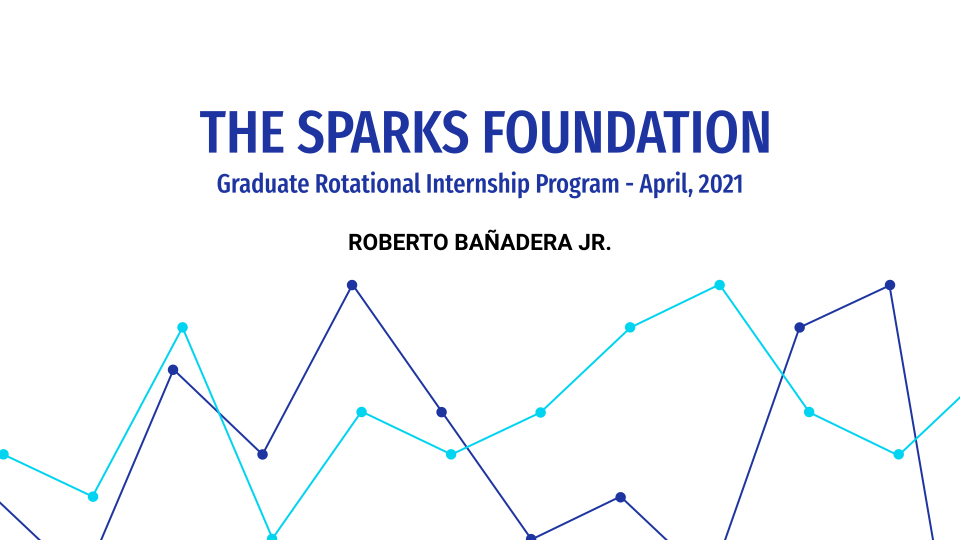

# SUPERVISED MACHINE LEARNING

### Import dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load data

In [2]:
df = pd.read_csv('student_scores.csv')

# Check data shape and type
print(df.shape)
print(df.info())
df

(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# Check for nulls and duplicates
print(df.isnull().sum())
print(df.duplicated().sum())

Hours     0
Scores    0
dtype: int64
0


### Train & Test Split

In [4]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model

In [6]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [7]:
pd.merge(pd.DataFrame(y_test), pd.DataFrame(y_pred), left_index=True, right_index=True)\
.rename(columns={'0_x':'Actual', '0_y':'Predicted'})

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### Evaluate model

In [8]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


# PREDICT OTHER VALUES

In [9]:
hour = int(input("How many hours do you study? "))

pred_2 = linreg.predict(np.array(hour).reshape(1,-1))
print("Predicted Score = {}".format(pred_2[0][0]))

How many hours do you study? 6
Predicted Score = 60.91936128063392
